In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data extraction of all test sets

In [6]:
# results of all models in NESTED_CV

def extraction_all(name):
    '''
    function that extracts and compiles a results dataframe as well as an 
    absolute error array for all modesl in NESTED_CV_results pickle files
    '''
    if name == 'MLR':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_MLR.pkl", compression='infer', storage_options=None)
        
    elif name == 'lasso':
        df =pd.read_pickle("NESTED_CV_RESULTS/17_feat_lasso.pkl", compression='infer', storage_options=None)

    elif name == 'kNN':
        df =pd.read_pickle("NESTED_CV_RESULTS/17_feat_kNN.pkl", compression='infer', storage_options=None)

    elif name == 'PLS':
        df =pd.read_pickle("NESTED_CV_RESULTS/17_feat_PLS.pkl", compression='infer', storage_options=None)

    elif name == 'SVR':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_SVR.pkl", compression='infer', storage_options=None)
        
    elif name == 'DT':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_DT.pkl", compression='infer', storage_options=None)

    elif name == 'RF':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_RF.pkl", compression='infer', storage_options=None)

    elif name == 'LGBM':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_LGBM.pkl", compression='infer', storage_options=None)
        
    elif name == 'XGB':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_XGB.pkl", compression='infer', storage_options=None)
             
    elif name == 'NGB':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_NGB.pkl", compression='infer', storage_options=None)

    elif name == 'NN':
        df = pd.read_pickle("NESTED_CV_RESULTS/17_feat_NN.pkl", compression='infer', storage_options=None)

    else:
        print("#######################\nSELECTION UNAVAILABLE!\n#######################\n\nPlease chose one of the following options:\n\n 'MLR' for multiple linear regression\n\n 'lasso' for multiple linear regression with east absolute shrinkage and selection operator (lasso)\n\n 'kNN'for k-Nearest Neighbors\n\n 'PLS' for partial least squares\n\n 'SVR' for support vertor regressor\n\n 'DT' for decision tree\n\n 'RF' for random forest\n\n 'LGBM' for LightGBM\n\n 'XBG' for XGBoost\n\n 'NGB' for NGBoost\n\n 'NN' for neural network")
    
    #df = pd.read_pickle(str(name)+"_NESTED_CV_results.pkl", compression='infer', storage_options=None)
    
    list_of_dataframes = []
    
    for n in range (10):
        dataframe = pd.DataFrame(df['Time'][n], columns=['Time'])
        dataframe['Experimental_Release'] = df['Experimental_Release'][n]
        dataframe['Predicted_Release'] = df['Predicted_Release'][n]
        dataframe['Experimental Index'] = df['Experimental Index'][n]
        dataframe['Absolute_Error'] = abs(dataframe['Experimental_Release'] - dataframe['Predicted_Release'])
        pd_series = dataframe['Absolute_Error']
        list_of_dataframes.append(dataframe)
    
    dataframe_all = pd.concat(list_of_dataframes, axis=0, ignore_index=True)
    
    return dataframe_all

In [7]:
ALL_MLR = extraction_all('MLR')
ALL_lasso = extraction_all('lasso')
ALL_kNN = extraction_all('kNN')
ALL_PLS = extraction_all('PLS')
ALL_SVR = extraction_all('SVR')
ALL_DT = extraction_all('DT')
ALL_RF = extraction_all('RF')
ALL_LGBM = extraction_all('LGBM')
ALL_XGB = extraction_all('XGB')
ALL_NGB = extraction_all('NGB')
ALL_NN = extraction_all('NN')

In [8]:
ALL_AE = pd.DataFrame(ALL_MLR['Absolute_Error'], columns=['MLR'])
ALL_AE['MLR'] = ALL_MLR['Absolute_Error']
ALL_AE['lasso'] = ALL_lasso['Absolute_Error']
ALL_AE['kNN'] = ALL_kNN['Absolute_Error']
ALL_AE['PLS'] = ALL_PLS['Absolute_Error']
ALL_AE['SVR'] = ALL_SVR['Absolute_Error']
ALL_AE['DT'] = ALL_DT['Absolute_Error']
ALL_AE['RF'] = ALL_RF['Absolute_Error']
ALL_AE['LGBM'] = ALL_LGBM['Absolute_Error']
ALL_AE['XGB'] = ALL_XGB['Absolute_Error']
ALL_AE['NGB'] = ALL_NGB['Absolute_Error']
ALL_AE['NN'] = ALL_NN['Absolute_Error']
sorted_index = ALL_AE.mean().sort_values().index
df9=ALL_AE[sorted_index]
df9.to_excel("Figure_1_dataset.xlsx")
df9.describe()

,LGBM,RF,NGB,XGB,DT,NN,kNN,SVR,lasso,PLS,MLR
count,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000
mean,0.113821,0.120081,0.125384,0.128659,0.158182,0.185426,0.185587,0.244299,0.252266,0.263409,0.265241
std,0.117120,0.123310,0.127016,0.133051,0.170353,0.164892,0.183758,0.199686,0.187996,0.246789,0.244202
min,0.000021,0.000000,0.000003,0.000013,0.000000,0.000002,0.000000,0.000025,0.000064,0.000058,0.000006
25%,0.023913,0.027713,0.027153,0.026657,0.023995,0.054316,0.036482,0.091915,0.110378,0.094838,0.100770
50%,0.075375,0.080313,0.084287,0.087955,0.109325,0.144528,0.133203,0.194190,0.234435,0.213331,0.218220
75%,0.167501,0.178610,0.185511,0.191175,0.234378,0.269230,0.274507,0.344415,0.341082,0.354870,0.354514
max,0.767180,0.790809,0.770505,0.910317,0.945698,0.907190,0.941910,1.465767,1.422795,1.943379,1.909699


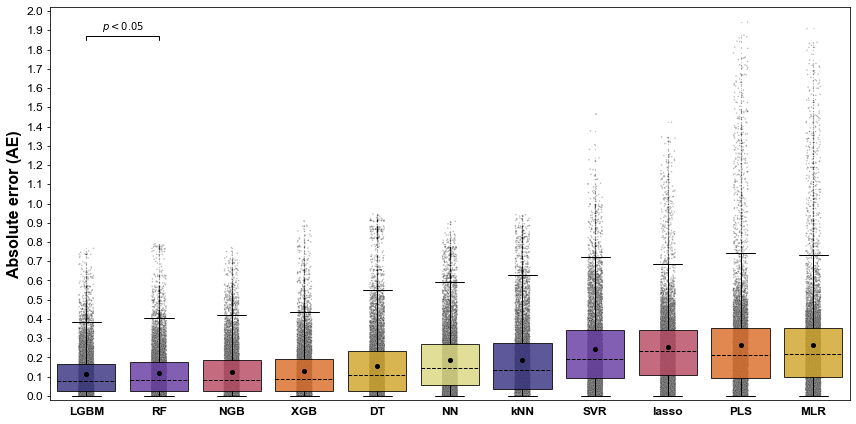

In [9]:
# figure set-up - size
f, boxplot = plt.subplots(figsize=(12, 6))

# choose color scheme
#palette = sns.color_palette("Paired")
#palette = sns.color_palette("pastel")
#palette = sns.color_palette("tab10")
palette = sns.color_palette("CMRmap")

# set boxplot style
boxplot = sns.set_style("white")

# boxplot set up and box-whis style
boxplot = sns.boxplot(palette=palette, 
                      data=df9, saturation = 0.8,
                      boxprops = dict(linewidth=1.0, edgecolor='black', alpha = 0.8),
                      whiskerprops = dict(linewidth=1.0, color='black'),
                      capprops = dict(linewidth=1.0, color='black'),
                      flierprops=dict(marker="d", markerfacecolor= "black", markeredgecolor="black", 
                                      markersize =0.5, alpha=0.2),
                      medianprops=dict(color="black", linewidth=1.0, linestyle= '--'), 
                      showmeans=True,
                      meanprops=dict(marker="o", markerfacecolor="black", alpha=1.0,
                                     markeredgecolor="black", markersize=4, linewidth=0.05, zorder=10))

# include each datapoint
boxplot = sns.stripplot(data=df9, marker="o", edgecolor='white', 
                        alpha=0.3, size=1.5, linewidth=0.3, color='black', jitter = True, zorder=0)

# Title
#boxplot.axes.set_title("ML model performance ranked by mean absolute error", fontsize=18, color="white", weight="bold")

# Title - x-axis/y-axis
#boxplot.set_xlabel("Model index", fontsize=12)
boxplot.set_ylabel("Absolute error (AE)", fontsize=16, color='black', 
                   weight="bold")

# y-axis limits and interval
boxplot.set(ylim=(-0.02, 2.02), yticks=np.arange(0,2.02,0.1))
#sns.despine(left=False, bottom=False)

# x-axis rotation and text color
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation = 0, color='black', fontsize=12)

# x-axis and y-axis tick color
boxplot.tick_params(colors='black', which='both')  # 'both' refers to minor and major axes

# x-axis and y-axis label color
boxplot.axes.yaxis.label.set_color('black')
boxplot.axes.xaxis.label.set_color('black')

# format graph outline (color)
boxplot.spines['left'].set_color('black')
boxplot.spines['bottom'].set_color('black')
boxplot.spines['right'].set_color('black')
boxplot.spines['top'].set_color('black')

# add tick marks on x-axis or y-axis
boxplot.tick_params(bottom=False, left=True)

#statistical annotation
#text you want to show in italics
x1, x2 = 0, 1  
y, h, col = 1.85, 0.02, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h+0.01, '$\it{p < 0.05}$', ha='center', va='bottom', color=col, fontsize=10)

# statistical annotation
#text you want to show in italics
#x1, x2 = 0, 2  
#y, h, col = 0.925, 0.02, 'black'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.75, c=col)
#plt.text((x1+x2)*.5, y+h+0.01, '$\it{p < 0.05}$', ha='center', va='bottom', color=col)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12, weight = "bold")

plt.tight_layout()

plt.savefig('Figures/Figure_1/BoxPLot', dpi=600, format = 'png', transparent=True, bbox_inches='tight')

#plt.show()